In [1162]:
import pandas as pd
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DengXian']
plt.rcParams.update({'font.size': 16})

# Load pre-computed decile ACS data

The income level were computed by Metropolitian Statistics Areas (MSAs); thus, please do analysis based on MSA only, NOT county- or state-level.

In [1177]:
# pwd

'H:\\Safegraph\\weekly_county_files\\weekly_patterns_time_aggre_2018_2021_test'

In [1178]:
# Set the data directory first:
Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'

MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
MSA_decile_df

<ipython-input-1178-c8f2d68d5438>:4: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,...,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,median_household_income_decile,county_fips
0,28.0,1,105,687100,1,32.538810,-87.365211,3.630738e+08,15000US011056871001,1105,...,1,105,15000US011056871001,6279926.0,172.0,36511.197674,0,011056871001,0.0,01105
1,29.0,1,105,687000,2,32.613224,-87.269014,5.349134e+07,15000US011056870002,1105,...,1,105,15000US011056870002,13069842.0,399.0,32756.496241,23494,011056870002,0.0,01105
2,148.0,1,133,965501,2,34.241708,-87.141064,7.349666e+07,15000US011339655012,1133,...,1,133,15000US011339655012,21077303.0,445.0,47364.725843,43080,011339655012,2.0,01133
3,151.0,1,133,965503,2,34.063547,-87.167204,5.437721e+07,15000US011339655032,1133,...,1,133,15000US011339655032,25729831.5,383.0,67179.71671,52431,011339655032,7.0,01133
4,152.0,1,133,965502,2,34.026184,-87.208888,6.900445e+07,15000US011339655022,1133,...,1,133,15000US011339655022,48117211.0,665.0,72356.708271,54792,011339655022,8.0,01133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219211,194510.0,48,505,950400,4,26.844204,-99.242335,4.413523e+07,15000US485059504004,48505,...,48,505,15000US485059504004,35529660.0,699.0,50829.270386,43550,485059504004,4.0,48505
219212,194511.0,48,505,950400,3,27.014826,-99.118435,1.578653e+09,15000US485059504003,48505,...,48,505,15000US485059504003,39367266.0,595.0,66163.472269,0,485059504003,7.0,48505
219213,194512.0,48,505,950302,3,26.902485,-99.249957,1.016389e+07,15000US485059503023,48505,...,48,505,15000US485059503023,37977220.5,703.0,54021.650782,33914,485059503023,6.0,48505
219214,194513.0,48,505,950301,1,26.919492,-99.260633,1.453950e+06,15000US485059503011,48505,...,48,505,15000US485059503011,35877132.5,911.0,39382.143249,29855,485059503011,2.0,48505


## Load POI-time aggregated data 

You can use any way to select the time-aggregation CSV files. 

The time-aggregation CSV files are stored in state_code directories: `45\51011_top_category_dwell_time_2021-12-27_To_2022-01-03.csv`.

The following is an example: loading the POI-time aggregated data of three MSAs in South Carolina.

Variable need to set: 

`POI_level`: top or sub

`start_time`: YYYY-MM, e.g., 2021-01

`end_time`: YYY-MM, e.g., 2021-02

In [1164]:
# Get the MSA names of SC 
MSA_list = MSA_decile_df[MSA_decile_df['CBSA Title'].str.contains('CA', case=True)]['CBSA Title'].unique() 
MSA_list

array(['Bakersfield, CA', 'Chico, CA', 'Clearlake, CA',
       'Crescent City, CA', 'El Centro, CA', 'Eureka-Arcata, CA',
       'Fresno, CA', 'Hanford-Corcoran, CA',
       'Los Angeles-Long Beach-Anaheim, CA', 'Madera, CA', 'Merced, CA',
       'Modesto, CA', 'Napa, CA', 'Oxnard-Thousand Oaks-Ventura, CA',
       'Red Bluff, CA', 'Redding, CA',
       'Riverside-San Bernardino-Ontario, CA',
       'Sacramento-Roseville-Folsom, CA', 'Salinas, CA',
       'San Diego-Chula Vista-Carlsbad, CA',
       'San Francisco-Oakland-Berkeley, CA',
       'San Jose-Sunnyvale-Santa Clara, CA',
       'San Luis Obispo-Paso Robles, CA', 'Santa Cruz-Watsonville, CA',
       'Santa Maria-Santa Barbara, CA', 'Santa Rosa-Petaluma, CA',
       'Sonora, CA', 'Stockton, CA', 'Susanville, CA',
       'Truckee-Grass Valley, CA', 'Ukiah, CA', 'Vallejo, CA',
       'Visalia, CA', 'Yuba City, CA'], dtype=object)

# Set the values

In [1175]:
# assign the POI category level in NAICS (top/sub):
POI_level = 'sub'

metric = 'vivits_per_capita' # select on from: ['time_per_capita', 'visit_cnt', 'visitor_cnt', 'vivits_per_capita']
# time span
start_time = '2020-12'
end_time = '2021-01' #  contain

In [1176]:
MSA_names = ['Columbia, SC', 'Charleston-North Charleston, SC', 'Greenville-Anderson, SC']
# MSA_names = ['Columbia, SC']
# MSA_names = ['Greenville-Anderson, SC']
# MSA_names = ['Charleston-North Charleston, SC']
# MSA_names = ['New York-Newark-Jersey City, NY-NJ-PA']
# MSA_names = ['Los Angeles-Long Beach-Anaheim, CA']

MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

MSA_counties = MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['county_fips'].unique() 
MSA_counties

array(['45019', '45015', '45035', '45079', '45081', '45063', '45017',
       '45039', '45055', '45077', '45059', '45045', '45007'], dtype=object)

In [1167]:
target_CSVs = []
for county_fips in MSA_counties:
    state_fips = county_fips[:2]
    county_dir = os.path.join(Data_dir, str(county_fips))
    county_POI_time_csvs = glob.glob(os.path.join(Data_dir, state_fips, county_fips, f'{county_fips}_{POI_level}_category_dwell_time_*To*.csv'))
    
    
    for f in county_POI_time_csvs:
        basename = os.path.basename(f)
        county_fips = basename[:5]
        if not county_fips  in MSA_counties:
            continue
        short_f = f.split('dwell_time_')[1]
        f_time = short_f[:7]
        # print(basename)
        
        if  start_time <= f_time and f_time <= end_time:
            target_CSVs.append(f)
            # print(f, len(targe_CSVs))


# select the correct CSVs
target_CSVs = target_CSVs[2:]

print("Date:", start_time, '-',end_time)    
print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])


county_POI_time_df = pd.concat([pd.read_csv(f) for f in target_CSVs])

# county_POI_time_df.sort_values('visitor_home_cbgs')

Date: 2020-12 - 2021-01
Found 102 files. Start to read them...
county_POI_time_df row counts: 102
The first and the last file: 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45019\45019_sub_category_dwell_time_2020-12-21_To_2020-12-28.csv 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45007\45007_sub_category_dwell_time_2021-01-25_To_2021-02-01.csv


In [1168]:
county_POI_time_agg_df = county_POI_time_df.groupby(['visitor_home_cbgs', f'{POI_level}_category'], as_index=False).agg(catetory_time = (f'normalized_{POI_level}_catetory_time', 'sum'),
                                                                                                               catetory_visit_cnt = (f'normalized_visit_cnt', 'sum'),
                                                                                                               catetory_visitor_cnt = (f'normalized_visitor_cnt', 'sum')
                                                                                                              )
county_POI_time_agg_df

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt
0,450070002001,All Other Amusement and Recreation Industries,3246.154872,72.136775,64.231375
1,450070002001,All Other General Merchandise Stores,217494.505426,10127.064234,8188.023291
2,450070002001,All Other Miscellaneous Store Retailers (excep...,6129.843864,221.147979,194.923449
3,450070002001,All Other Nondepository Credit Intermediation,335.420310,67.084062,67.084062
4,450070002001,Amusement and Theme Parks,88749.848806,548.220752,333.935242
...,...,...,...,...,...
137219,450819604003,Sporting Goods Stores,9544.997220,508.239450,408.509252
137220,450819604003,Supermarkets and Other Grocery (except Conveni...,55464.252639,1430.040113,939.046846
137221,450819604003,Tobacco Stores,41951.083018,496.414682,196.413941
137222,450819604003,Used Merchandise Stores,37449.637163,602.053810,390.170700


In [1169]:
county_POI_time_agg_df['visitor_home_cbgs'] = county_POI_time_agg_df['visitor_home_cbgs'].astype(str).str.zfill(12)
county_POI_time_agg_df['state_fips'] = county_POI_time_agg_df['visitor_home_cbgs'].str[:2]
county_POI_time_agg_df.head(5)

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips
0,450070002001,All Other Amusement and Recreation Industries,3246.154872,72.136775,64.231375,45
1,450070002001,All Other General Merchandise Stores,217494.505426,10127.064234,8188.023291,45
2,450070002001,All Other Miscellaneous Store Retailers (excep...,6129.843864,221.147979,194.923449,45
3,450070002001,All Other Nondepository Credit Intermediation,335.420310,67.084062,67.084062,45
4,450070002001,Amusement and Theme Parks,88749.848806,548.220752,333.935242,45


In [1170]:
# add MSA infor
county_POI_time_ACS_df = county_POI_time_agg_df.merge(MSA_decile_df[['cbg_fips', 'median_household_income', 'median_household_income_decile', 'cbg_total_population']], left_on='visitor_home_cbgs', right_on='cbg_fips')

county_POI_time_ACS_df  

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips,cbg_fips,median_household_income,median_household_income_decile,cbg_total_population
0,450070002001,All Other Amusement and Recreation Industries,3246.154872,72.136775,64.231375,45,450070002001,45347,4.0,1426
1,450070002001,All Other General Merchandise Stores,217494.505426,10127.064234,8188.023291,45,450070002001,45347,4.0,1426
2,450070002001,All Other Miscellaneous Store Retailers (excep...,6129.843864,221.147979,194.923449,45,450070002001,45347,4.0,1426
3,450070002001,All Other Nondepository Credit Intermediation,335.420310,67.084062,67.084062,45,450070002001,45347,4.0,1426
4,450070002001,Amusement and Theme Parks,88749.848806,548.220752,333.935242,45,450070002001,45347,4.0,1426
...,...,...,...,...,...,...,...,...,...,...
136260,450819604003,Sporting Goods Stores,9544.997220,508.239450,408.509252,45,450819604003,35208,1.0,657
136261,450819604003,Supermarkets and Other Grocery (except Conveni...,55464.252639,1430.040113,939.046846,45,450819604003,35208,1.0,657
136262,450819604003,Tobacco Stores,41951.083018,496.414682,196.413941,45,450819604003,35208,1.0,657
136263,450819604003,Used Merchandise Stores,37449.637163,602.053810,390.170700,45,450819604003,35208,1.0,657


In [1171]:
county_POI_time_ACS_MSA_df = county_POI_time_ACS_df.groupby([ 'median_household_income_decile', f'{POI_level}_category'], as_index=False).agg(
    visit_cnt = (f'catetory_visit_cnt', 'sum'),
    visitor_cnt = ('catetory_visitor_cnt', 'sum'),
    total_decile_time = ('catetory_time', 'sum'), 
    total_decile_population = ('cbg_total_population', 'sum'),
    )

county_POI_time_ACS_MSA_df['time_per_capita'] = county_POI_time_ACS_MSA_df['total_decile_time'] / county_POI_time_ACS_MSA_df['total_decile_population']
county_POI_time_ACS_MSA_df['vivits_per_capita'] = county_POI_time_ACS_MSA_df['visit_cnt'] / county_POI_time_ACS_MSA_df['total_decile_population']

county_POI_time_ACS_MSA_df

,median_household_income_decile,sub_category,visit_cnt,visitor_cnt,total_decile_time,total_decile_population,time_per_capita,vivits_per_capita
0,0.0,All Other Amusement and Recreation Industries,34338.337129,23920.194802,5.036935e+06,127435,39.525520,0.269458
1,0.0,All Other Automotive Repair and Maintenance,479.823171,324.156376,3.167601e+04,7600,4.167896,0.063135
2,0.0,All Other Consumer Goods Rental,1397.638493,787.377084,1.340709e+05,19865,6.749100,0.070357
3,0.0,All Other General Merchandise Stores,720169.300879,570449.734655,1.454266e+07,170567,85.260663,4.222208
4,0.0,All Other Health and Personal Care Stores,5212.959323,3674.185543,3.066761e+05,50552,6.066546,0.103121
...,...,...,...,...,...,...,...,...
2789,9.0,Wind Electric Power Generation,204.163610,67.084062,2.204967e+04,3024,7.291558,0.067514
2790,9.0,Wineries,2813.312600,2275.843916,1.902588e+05,94483,2.013683,0.029776
2791,9.0,Wireless Telecommunications Carriers (except S...,19552.082283,15106.941186,1.159922e+06,217888,5.323478,0.089735
2792,9.0,Women's Clothing Stores,217081.728673,173960.818985,8.206283e+06,319269,25.703349,0.679934


In [1172]:
print("Blockgroup count:", len(county_POI_time_ACS_MSA_df[f'{POI_level}_category'].unique()))

Blockgroup count: 306


In [1173]:
# find the top-k visit count:
k = 5
print(f'Top {k} {metric}:'  )
top_k_category = county_POI_time_ACS_MSA_df.groupby([f'{POI_level}_category'], as_index=True).agg(
    metric_value = (metric, 'mean'))['metric_value'].nlargest(k).index

top_k_category = top_k_category[::-1]
top_k_category

Top 5 vivits_per_capita:


Index(['Gasoline Stations with Convenience Stores',
       'All Other General Merchandise Stores', 'Limited-Service Restaurants',
       'Full-Service Restaurants', 'Malls'],
      dtype='object', name='sub_category')

MSA: ['Columbia, SC', 'Charleston-North Charleston, SC', 'Greenville-Anderson, SC']


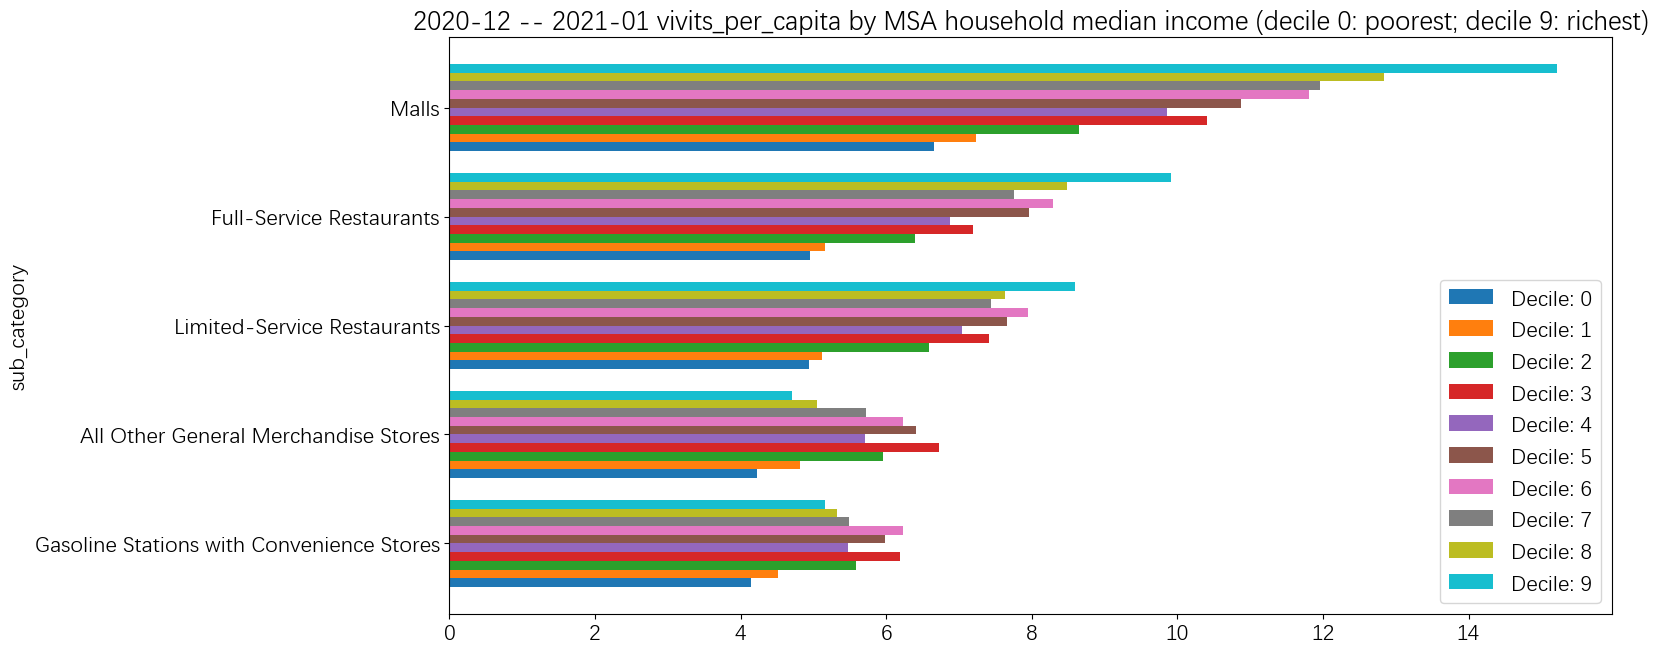

In [1174]:
deciles = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

print("MSA:", MSA_names)

target_df = county_POI_time_ACS_MSA_df[county_POI_time_ACS_MSA_df['median_household_income_decile'].isin(deciles)].set_index(f'{POI_level}_category').fillna(0)
target_df_gb = target_df.groupby('median_household_income_decile')

df_list = []
for decile, df in target_df_gb:
    decile_column = f'Decile: {decile:0.0f}'
    # df[decile_column] = df['total_visit_cnt']
    df[decile_column] = df[metric] 
   
    df_list.append(df[[decile_column]])
    
target_df = pd.concat(df_list, axis=1 )
fig, ax = plt.subplots(figsize=(15, 1.5 * len(top_k_category)))
ax.set_title(f'{start_time} -- {end_time} {metric} by MSA household median income (decile 0: poorest; decile 9: richest)')
ax = target_df.loc[top_k_category].plot.barh(ax = ax, width=0.8)
plt.savefig(f'{"+".join(MSA_names)}_{metric}_{start_time}-{end_time}.png', dpi=254)
plt.show()

smartphone per capita? 